<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_12/dstep23_interactive_plotting_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Interactive Plotting with `plotly`**

*November 16, 2023*

This notebook will provide example, single-panel interactive visualizations with `plotly`.


---

In [1]:
!pip install plotly_express

In [2]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

import plotly_express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First let's load some data and make sample plots using matplotlib.

In [3]:
# -- load the Minneapolis police stops data
fname = "https://opendata.arcgis.com/datasets/215b4b543d894750aef86c725b56ee2a_0.csv"

# -- load the data
stops = pd.read_csv(fname, parse_dates=["responseDate"], low_memory=False)

# -- set response date to date (as opposed to date and time)
stops["responseDate"] = pd.to_datetime(stops["responseDate"].dt.date)

# -- make a time series of all stops
stops_ts = stops.groupby("responseDate").count()["OBJECTID"].reset_index()

# -- and let's make a count by race and year for 2018 and 2019
stops_1819 = stops[(stops.responseDate >= "2018-01-01") & (stops.responseDate < "2020-01-01")]
stops_ry = stops_1819.groupby([stops_1819.responseDate.dt.year, "race"]).count()
stops_ry = stops_ry.unstack("responseDate")
stops_ry = stops_ry["OBJECTID"]
stops_ry = stops_ry.reset_index()
stops_ry.columns = ["race", "2018", "2019"]

In [5]:
# -- load the world bank data
fname = "/content/drive/Shareddrives/dstep23/data/world_bank/world_bank_gdp_leb.csv"
wb = pd.read_csv(fname)
wb["lpop"] = np.log10(wb["pop2017"])

In [6]:
# -- load NYC zip codes
zname = "/content/drive/Shareddrives/dstep23/data/geos/nyc/zipcode_shapes/ZIP_CODE_040114.shp"
zshps = gp.read_file(zname)
zshps["geometry"] = zshps.simplify(100)
zshps = zshps.to_crs("epsg:4326")

## **Matplotlib**

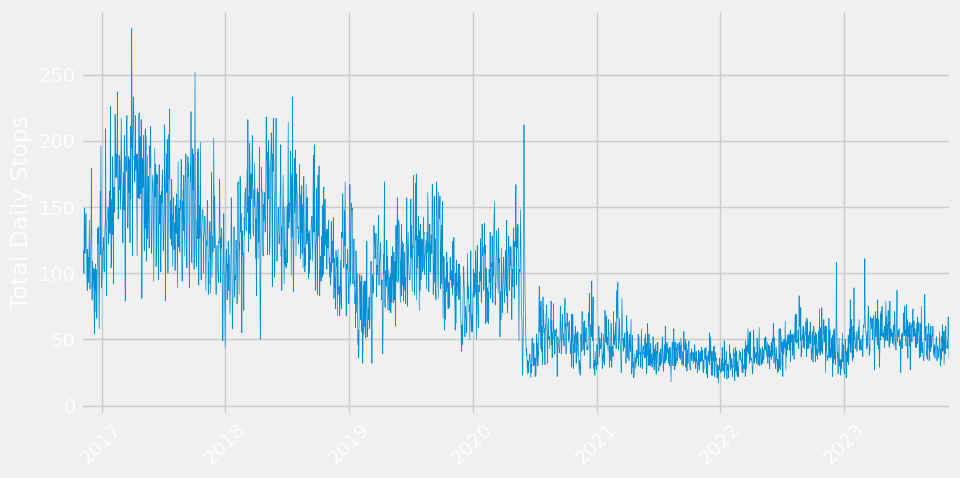

In [18]:
# -- reset default MPL stylesheet
plt.style.use("fivethirtyeight")

# -- basic matplotlib line plot
fig, ax = plt.subplots(figsize=[10, 5])
stops_ts.plot("responseDate", "OBJECTID", lw=0.5, legend=False, ax=ax)
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("Total Daily Stops")
ax.tick_params(axis="x", rotation=45)
fig.show()

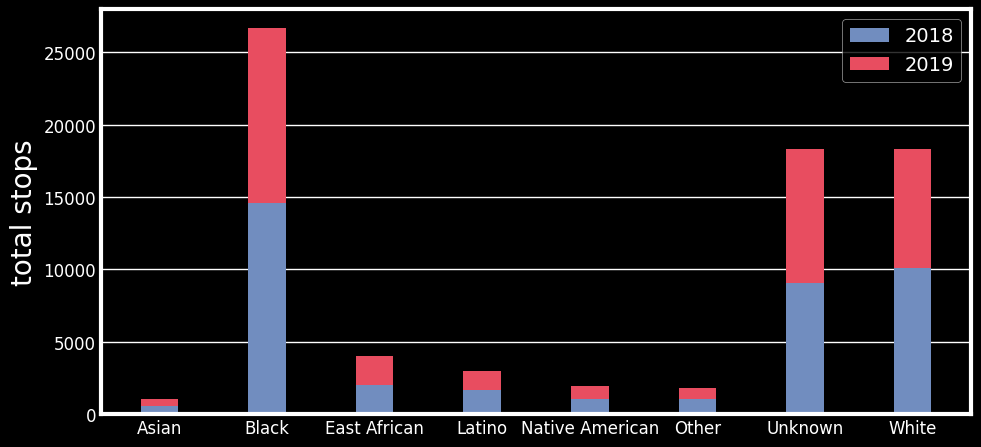

In [17]:
# -- reset default MPL stylesheet
plt.style.use("dark_background")

# -- basic matplotlib bar chart
fig, ax = plt.subplots(figsize=[10, 5])
bars18 = ax.bar(stops_ry.index, stops_ry["2018"], width=0.35, color="#718dbf", label="2018")
bars19 = ax.bar(stops_ry.index, stops_ry["2019"], bottom=stops_ry["2018"], width=0.35, color="#e84d60", label="2019")
ax.grid(axis="x")
ax.set_xticks(stops_ry.index)
ax.set_xticklabels(stops_ry["race"])
ax.legend(fontsize=14)
ax.tick_params(labelsize=12)
ylab = ax.set_ylabel("total stops", fontsize=20)
fig.show()

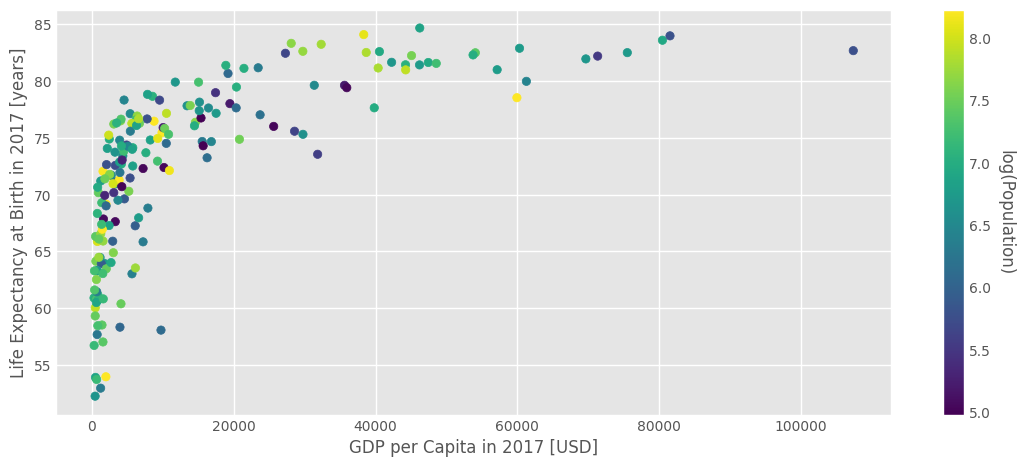

In [9]:
# -- reset default MPL stylesheet
plt.style.use("ggplot")

# -- basic matplotlib scatter plot
fig, ax = plt.subplots(figsize=[12, 5])

lpop = np.log10(wb["pop2017"])
lpop = lpop.clip(lpop.min(), 0.9 * lpop.max())
sct = plt.scatter(wb["gpc2017"], wb["leb2017"], c=lpop, cmap=plt.cm.viridis)
cax = fig.colorbar(sct, ax=ax)

ax.set_xlabel("GDP per Capita in 2017 [USD]")
ax.set_ylabel("Life Expectancy at Birth in 2017 [years]")
cax.ax.set_ylabel("log(Population)", rotation=-90, va="bottom")

fig.show()

### ***PLOTLY*: LINE PLOT**

In [25]:


#same result different syntax
tmp =dict(OBJECTID:"number of stops", responseDate:"date")

tmp = {"OBJECTID":"number of stops", "responseDate":"date"}

SyntaxError: ignored

In [24]:
fig = px.line(stops_ts, x="responseDate", y="OBJECTID", color_discrete_sequence=["steelblue"],
              labels=tmp, width=900, height=500)

fig.show()

NameError: ignored

### ***PLOTLY*: BAR CHART**

### ***PLOTLY*: SCATTER PLOT**

### ***PLOTLY*: CHOROPLETH**